In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 25000)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

# Toxicity linear word oh

AUC score 0.9614058676275222


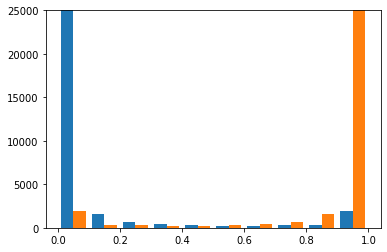

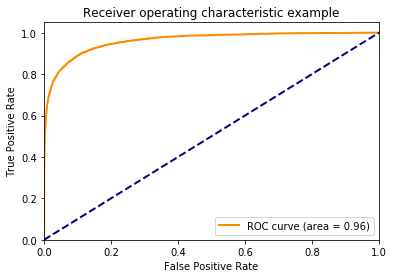

AUC score 0.8314906437248124
CM 35670 422 1246 2584
F1-score 0.7559976594499707
imbalanced_accuracy_score 0.9582185261259456


In [4]:
report_results("linear_word_oh_toxicity_prediction_results.csv")

# toxicity linear char oh

AUC score 0.92841810970654


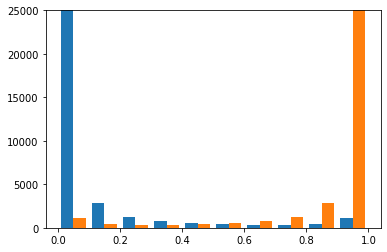

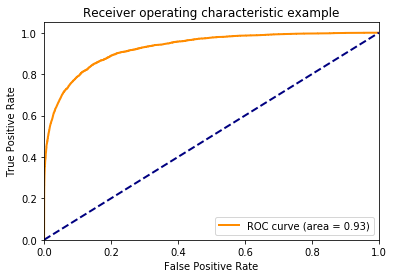

AUC score 0.753933272597682
CM 35494 518 1868 2042
F1-score 0.6312210200927357
imbalanced_accuracy_score 0.9402334552377135


In [5]:
report_results("linear_char_oh_toxicity_prediction_results.csv")

# toxicity mlp word oh

AUC score 0.9530019480046992


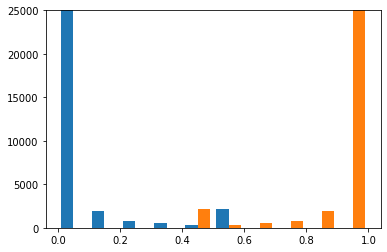

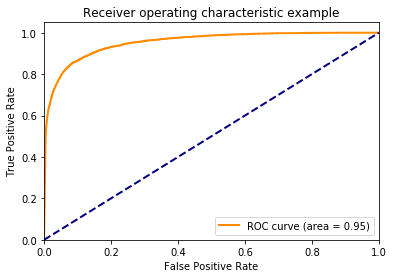

AUC score 0.7584471170667018
CM 35951 193 1805 1973
F1-score 0.6638627187079408
imbalanced_accuracy_score 0.9499524071940284


In [6]:
report_results("mlp_word_oh_toxicity_prediction_results.csv")

# toxicity mlp char oh

AUC score 0.9474251394649714


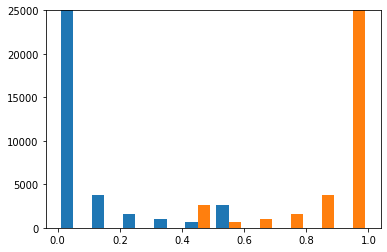

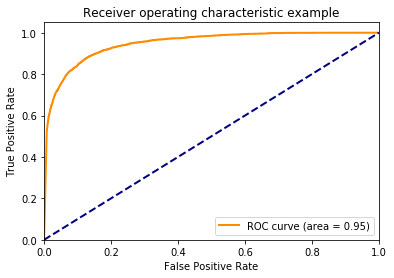

AUC score 0.7805908074777242
CM 35596 434 1661 2231
F1-score 0.6804941284123837
imbalanced_accuracy_score 0.9475226692049497


In [7]:
report_results("mlp_char_oh_toxicity_prediction_results.csv")

# lstm toxicity word

AUC score 0.9665009639645206


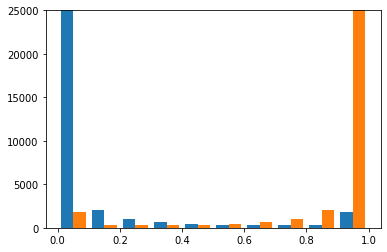

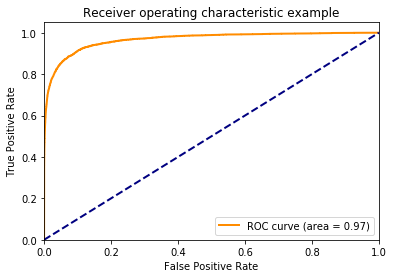

AUC score 0.8527021243765119
CM 35645 457 1077 2743
F1-score 0.7814814814814814
imbalanced_accuracy_score 0.961575071389209


In [8]:
report_results("lstm_word_oh_toxicity_prediction_results.csv")

# lstm toxicity char

AUC score 0.8225240587511562


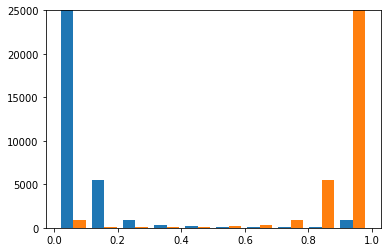

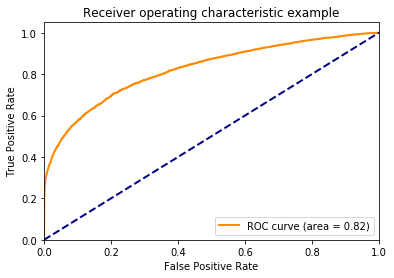

AUC score 0.6452299307345456
CM 35896 171 2717 1138
F1-score 0.4407436096049574
imbalanced_accuracy_score 0.9276589349231


In [9]:
report_results("lstm_char_oh_toxicity_prediction_results.csv")

# conv-lstm toxicity word

AUC score 0.9472353174968188


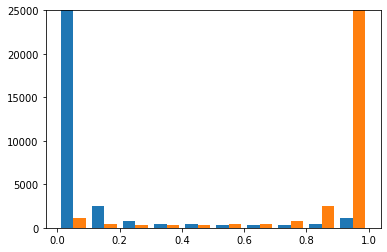

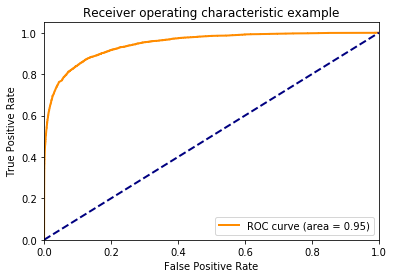

AUC score 0.7843857857445945
CM 35697 364 1626 2235
F1-score 0.6919504643962847
imbalanced_accuracy_score 0.9501527979560143


In [10]:
report_results("conv_lstm_word_oh_toxicity_prediction_results.csv")

# conv-lstm toxicity char

AUC score 0.9503748962198858


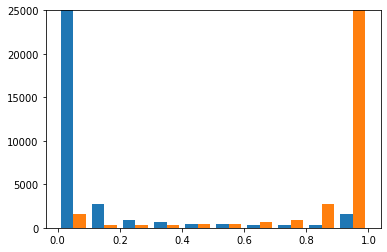

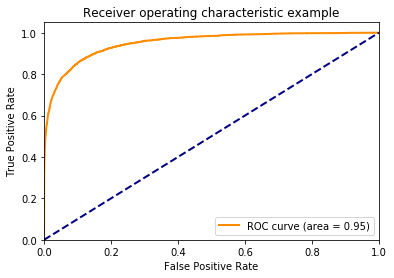

AUC score 0.8063458599040219
CM 35437 554 1462 2469
F1-score 0.7100949094046591
imbalanced_accuracy_score 0.9495015279795601


In [11]:
report_results("conv_lstm_char_oh_toxicity_prediction_results.csv")

In [12]:
toxicity_data = pd.read_csv("../toxicity_parsed_dataset.csv")
toxicity_data['Text'] = toxicity_data['Text'].apply(lambda x: str(x).replace("NEWLINE_TOKEN", " "))
toxicity_data['Text'] = toxicity_data['Text'].apply(lambda x: str(x).replace("TAB_TOKEN", " "))

In [13]:
len(toxicity_data)

159686

In [14]:
len(toxicity_data[toxicity_data["oh_label"] == 1])

15362

In [15]:
len(toxicity_data[toxicity_data["oh_label"] == 0])

144324